# Comisión 42370 Data Science 
# Alumna: Sijing Liu

# Dataset 1 Adult Income USA

Este dataset proveniente de "1994 US Census Income Data" incluye 15 columnas y 48842 filas.  Con las distintas variables sobre un individuo como la educación, edad, genero, trabajo, etc. se pretende predecir si su ingreso anual supera 50k.

fuente de dataset: Kaggle (https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

# Abstracto

El dataset Adult Income USA es un dataset de 15 columnas y 48842 filas que se utiliza para clasificar si el ingreso anual de un individuo residente de los EEUU supera los USD 50k.  Sabemos que el ingreso de una persona es influenciada por su edad, género, nivel educativo, ocupación, etc.  En este proyecto vamos a explorar la asociación entre los diferentes atributos y la variable Target y vamos a resolver el mencionado problema de clasificación.  

Los 14 atributos de un individuo son los siguientes:
1.  Edad: la edad del individuo.
2.  Tipo de trabajo (sector privado, sector público, autónomo, voluntariado, etc.)
3.  Fnlwgt: final weight, es un código que representa cada individuo censado
4.  Education: el nivel educativo más alto alcanzado por un individuo, tiene 16 categorías diferentes.
5.  Education-num: el nivel educativo más alto alcanzado por un individuo en formato numérico.
6.  Marital-status: estado matrimonial del individuo.  Married­-civ­-spouse es casado por civil y Married-AF-spouse significa casado en las fuerzas armadas.  Tiene 7 categorías diferentes.
7.  Occupation: la ocupación del individuo.  Tiene 14 categorías distintas. 
8.  Relación: este atributo se refiere a la situación familiar, por ejemplo, indica si el individuo tiene hijo o si está casado.  
9.  Race: la etnia del individuo.  
10.  Sex: el género
11.  Capital-gain: ganancias del capital
12.  Capital-loss: pérdidas del capital
13.  Hours-per-week: la cantidad de horas trabajadas en una semana.
14.  Native country: el país natal del individuo

La variable target es: 
Income: <=50k o >50k

Estructuraremos el estudio de la siguiente manera: En primer lugar vamos a realizar un análisis de datos exploratorio para investigar visualmente las variables demográficas de los individuos; en segundo lugar analizaremos la asociación o correlación entre las distintas variables; finalemnte utilizaremos los resultados obtenidos y observados para armar los modelos de clasificación y así poder concluir acerca de las caracteristicas que permitan identificar patrones comunes en los individuos para determinar el ingreso anual.

## Objetivo 
Predecir si un individuo gana más de USD 50k anual dados algunos atributos mediante la utilización de algoritmos de clasificación, identificando las principales variables que determinan el resultado de la clasificación.

## Contexto Comercial: 
El censo del 1994 de los Estados Unidos muestra cierta tendencia demográfica del país.  Queremos revelar estas tendencias a través del análisis de los datos y comprender cuáles son los principales atributos demográficos que determinarán el nivel de ingreso de un individuo.  Y a partir de ahí, predecir el ingreso de un individuo utilizando un dataset de testing.   

## Problema Comercial 
El problema es explorar los datos para poder responder a las siguientes preguntas: ¿Cuáles son las características demográficas que permiten determinar el ingreso de un individuo? ¿Cuál sería el mejor modelo de clasificación que se adapte a este contesto?

## Contexto analítico
Exploraremos las variables demográficas como edad, género, nivel educativo, estado civil, etc. para establecer cuáles son las variables principales que influyen en el nivel de ingreso de un individuo.  Luego elegiremos el modelo de clasificación más adecuado para determinar si un individuo ganará más de USD 50k.  

# Data Acquisition

In [30]:
#Correr
import pandas as pd
import numpy as np

file_path = "/Users/lasha/Desktop/Python/Datasets/adult.csv"
df_adult_income = pd.read_csv(file_path)
df_adult_income.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


In [44]:
df_adult_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


### El dataset tiene 15 variables, 12 son categóricas y 3 son numéricas (Capital Gain, Capital Loss y hours per week)

# Exploratory Data Analysis

Para entender de qué se trata cada uno de los atributos y comprender la relación que existe entre los atributos y la variable target, nos hacemos las siguientes preguntas e intentemos visualizarlos a través de los distintos gráficos: 
1.  ¿Cómo se distribuye la variable Edad en esta muestra?
2.  ¿Cómo se distribuye la etnia?
3.  ¿Cómo son las ocupaciones de los individuos en la muestra?
4.  ¿Cómo es el estado matrimonial de los individuos en la muestra?
5.  ¿Cómo se relaciona la edad y el nivel educativo con el nivel de ingreso?
6.  ¿Cómo se asocia la edad y el género con el nivel de ingreso?
7.  ¿Cuántas horas trabajan los individuos?
8.  ¿Cómo se asocia la etnia con el nivel de ingreso discriminado entre los que ganan más de 50k y los que no?

In [45]:
df_adult_income.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48842.0,NaN,NaN,NaN,38.643585,13.71051,17.0,28.0,37.0,48.0,90.0
workclass,48842,9,Private,33906,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48842.0,NaN,NaN,NaN,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842,16,HS-grad,15784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48842.0,NaN,NaN,NaN,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842,7,Married-civ-spouse,22379,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48842,15,Prof-specialty,6172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48842,6,Husband,19716,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48842,5,White,41762,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48842,2,Male,32650,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
#Correr
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
mpl.style.use('bmh')

In [1]:
!pip3 install seaborn

In [4]:
conda list seaborn

# packages in environment at /Users/lasha/opt/anaconda3:
#
# Name                    Version                   Build  Channel
seaborn                   0.11.2             pyhd3eb1b0_0  

Note: you may need to restart the kernel to use updated packages.


### Primero queremos visualizar cómo se distribuye el target Income

Text(0, 0.5, 'cantidad')

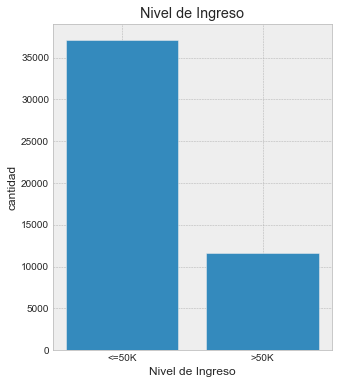

In [47]:
aux_4 = df_adult_income.income.value_counts()
fig, ax = plt.subplots(figsize=(5, 6))
ax.bar(aux_4.index, aux_4)
ax.set_title('Nivel de Ingreso')
ax.set_xlabel('Nivel de Ingreso')
ax.set_ylabel('cantidad')

### En el gráfico vemos que más de 35000 individuos ganan (representan 76% del total) menos de 50k anual.  Podemos decir que esta base es desbalanceada.  

### Queremos ver cómo se distribuye la edad de los individuos en este dataset.  
### Recordemos que en la descripción de los datos, la edad promedio de la población es cerca de 39 años y la mediana está en 37 años.   

Text(0, 0.5, 'Frecuencia absoluta')

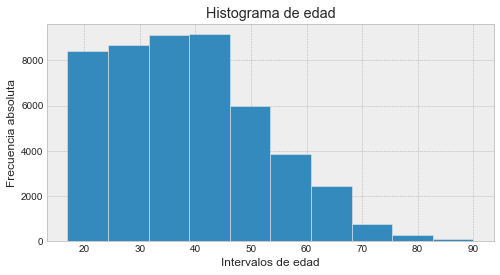

In [48]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(df_adult_income.age, bins=10)
ax.set_title('Histograma de edad')
ax.set_xlabel('Intervalos de edad')
ax.set_ylabel('Frecuencia absoluta')

### El gráfico revela la distribución de la edad de la población y vemos que la mayoría de los individuos tienen menos de 45 años y menos de 2000 individuos tienen más de 70 años.  

### Después de conocer la edad de los individuos, queremos ver cómo se compone la etnia de la población, ya que sabemos que EEUU es un país que recibió inmigrantes/esclavos en diferentes épocas en la historia.  

In [49]:
aux_1 = df_adult_income[['fnlwgt','race']].groupby(by='race').count()
aux_1
aux_1.index

Index(['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White'], dtype='object', name='race')

Text(0.5, 1.0, 'Piechart de etnia')

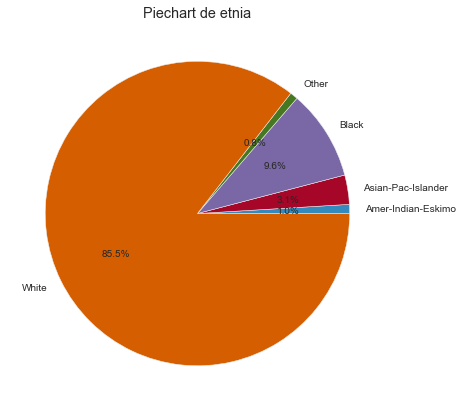

In [50]:
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(aux_1.fnlwgt, labels = aux_1.index,autopct='%1.1f%%')
ax.set_title('Piechart de etnia')

### En este gráfico podemos ver que el 85.5% de la población pertenece a la etnia blanca, aproximadamente 10% de la población es de raza negra y 3% son asiáticos.  En comparación con las estadísticas publicadas más recientemente de EEUU (75% de raza blanca), nuestra base de datos contiene una alta concentración de la raza blanca y no tiene población latina.

### Ahora queremos conocer el estado civil de la población que contiene nuestra base de datos.  

Text(0.5, 1.0, 'Piechart de estado civil')

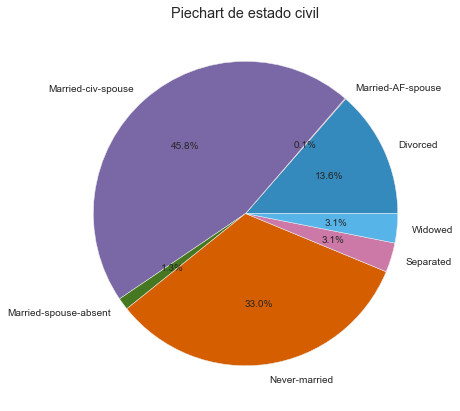

In [51]:
aux_2 = df_adult_income[['fnlwgt','marital-status']].groupby(by='marital-status').count()
aux_2
aux_2.index
fig,ax = plt.subplots(figsize =(10, 7))
ax.pie(aux_2.fnlwgt, labels = aux_2.index,autopct='%1.1f%%')
ax.set_title('Piechart de estado civil')

### El gráfico muestra que el 45.8% de la población está casado por civil, el 33% nunca estuvo casado, el 13.6% es divorciado y otros 6.2% está viudo o separado.  Nos llama la atención del alto porcentaje de la población que nunca estuvo casado, pero tiene cierta relación con la distribución de la edad que vimos en el primer gráfico, ya que el 50% de la población se encuentra por debajo de 37 años.

### Luego queremos analizar las ocupaciones que tienen los individuos a través del gráfico de barras.  

Text(0, 0.5, 'cantidad')

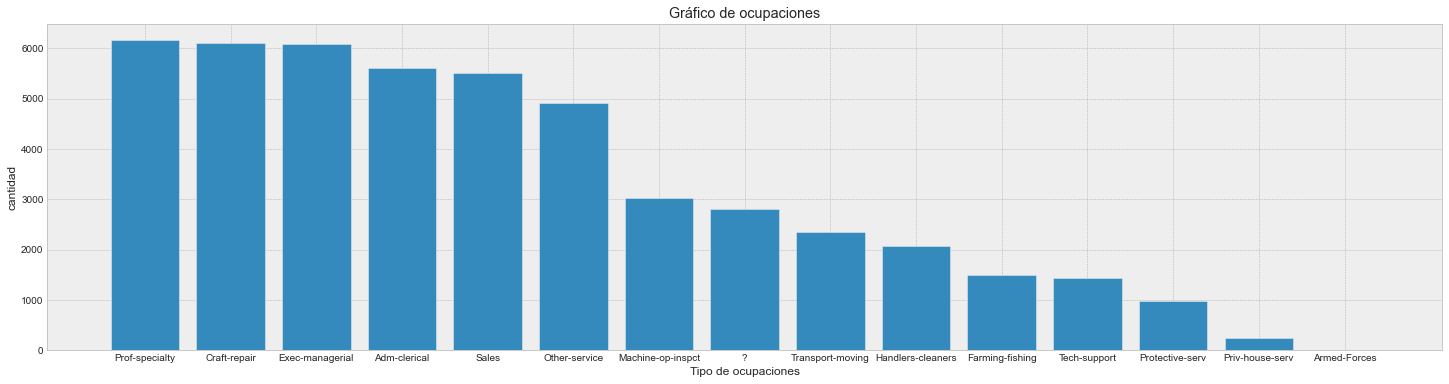

In [52]:
aux_3 = df_adult_income.occupation.value_counts()
fig, ax = plt.subplots(figsize=(25, 6))
ax.bar(aux_3.index, aux_3)
ax.set_title('Gráfico de ocupaciones')
ax.set_xlabel('Tipo de ocupaciones')
ax.set_ylabel('cantidad')

### Las ocupaciones más populares en esta base de datos son los profesionales especialistas, artesanos/reparadores y gerentes ejecutivos.  Notamos que una buena cantidad de individuos tiene una ocupación asignada como "?".  En la parte de Data Wrangling vamos a solucionar este inconveniente.    

### A continuación queremos conocer cómo se comporta  la variable "hours-per-week".  Usamos un gráfico de histograma y otro de densidad para representar la misma idea.  

[Text(0.5, 0, 'hours-per-week'),
 Text(0, 0.5, 'Cantidad de personas'),
 Text(0.5, 1.0, 'Distribución de las horas trabajadas')]

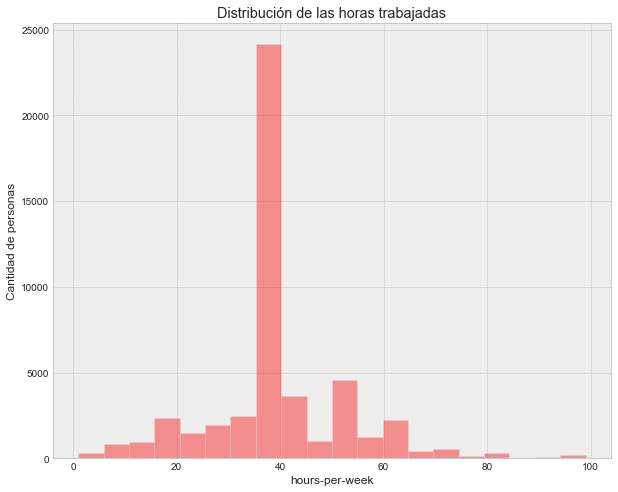

In [53]:
plt.figure(figsize=(10,8))
#Kernel Density Estimation (KDE) is a way to estimate the probability density function of a continuous random variable.
ax = sns.distplot(df_adult_income['hours-per-week'], kde = False, color ='red', bins = 20)
ax.set(xlabel='hours-per-week', ylabel='Cantidad de personas', title='Distribución de las horas trabajadas')

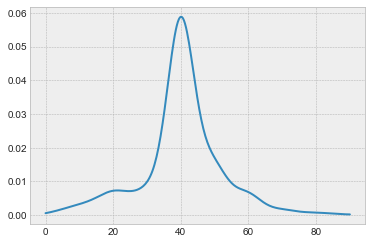

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde

density_function = kde.gaussian_kde(df_adult_income['hours-per-week'], bw_method=0.3)
x = np.linspace(0, 90, 300)

plt.plot(x, density_function(x))
plt.show()

### Los dos gráficos muestran que la moda de la distribución es 40, es decir, la mayoría de los individuos trabajan 40 horas semanales.  

### Ahora queremos analizar la correlación entre la edad, el nivel educativo y el nivel de ingreso utilizando el scatterplot.  

<AxesSubplot:xlabel='age', ylabel='educational-num'>

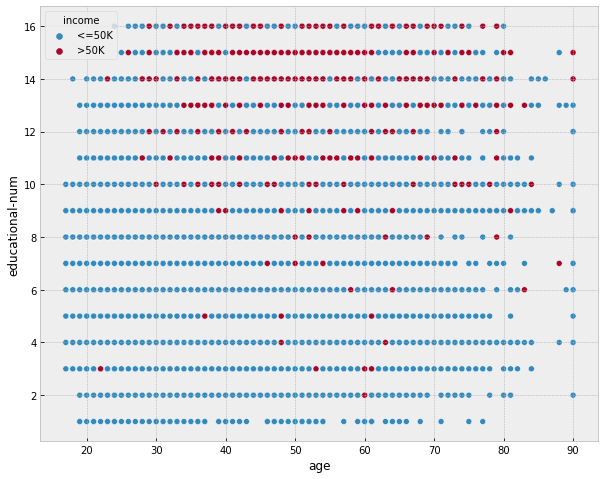

In [22]:
plt.figure(figsize=(10,8))
sns.scatterplot(data = df_adult_income, x ="age", y= "educational-num",hue="income")

### El gráfico muestra que no existe una correlación clara entre la edad, el nivel educativo y el nivel de ingreso.  Sin embargo, vemos que la mayoría de los que ganan más de 50k tienen un nivel educativo superior al nivel 10 (universitario no terminado).  Por otro lado, el nivel de ingreso no tiene una correlación con la edad.  

### A continuación queremos ver si la edad se distribuye de la misma forma para los hombres que para las mujeres.  

<AxesSubplot:xlabel='gender', ylabel='age'>

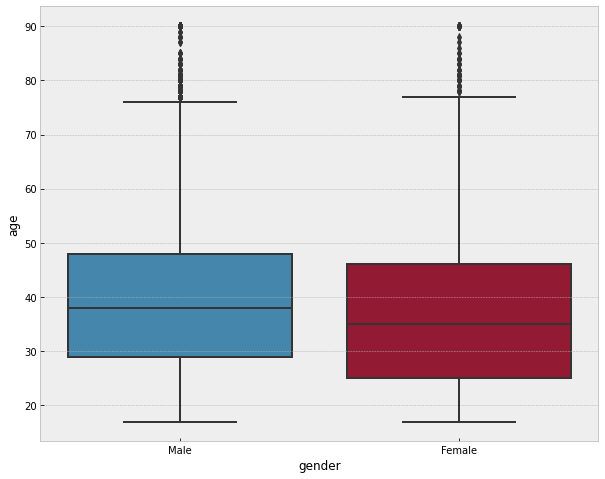

In [35]:
plt.figure(figsize=(10,8))
sns.boxplot(data = df_adult_income, x="gender", y="age")

### El gráfico de boxplot muestra que la distribución de la edad difiere entre los varones y las mujeres.  Los varones se concentran en las edades entre 30 y 50 años y las mujeres son mayoría entre 25 y 45 años.  Ambos géneros tienen valores outlier por encima de los 80 años.  Recordemos que la mediana de la población de esta base de datos es de 37 años. 

### Luego queremos explorar la relación entre la cantidad de horas trabajadas por semana y el nivel educativo de los individuos.  

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

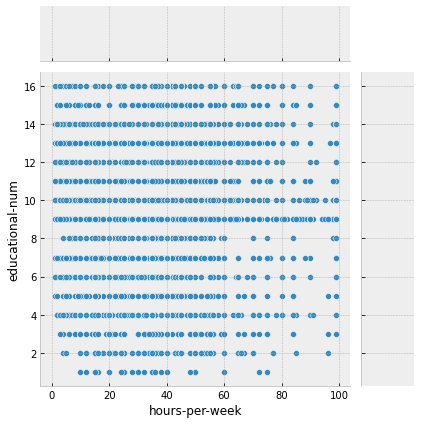

In [7]:
import warnings
warnings.filterwarnings('ignore')

sns.jointplot(x ='hours-per-week', y ='educational-num', data = df_adult_income)


### Lamentablemente no vemos una correlación entre estas dos variables.  

### Ahora queremos explorar el nivel de ingreso en las diferentes etnias y cómo varía éste con la edad.  

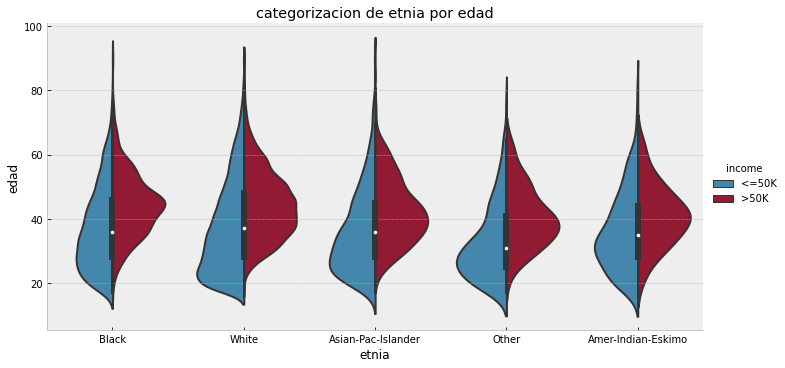

In [27]:
ax = sns.catplot(data=df_adult_income, kind='violin', x='race', y='age', hue='income', height=5, aspect=2, split=True)
ax.set(xlabel='etnia', ylabel='edad', title='categorizacion de etnia por edad')

### Vemos que el mayor nivel del ingreso se concentra cerca de los 40+ en todas las etnias y el menor ingreso se ubica entre las edades 20 y 40.  Es interesante ver la diferencia en la distribución del ingreso entre los "White" y los "Black", sobre todo en los que ganan menos de 50K anual. 

# Data Wrangling

In [55]:
#El dataset no tiene nulos
df_adult_income.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [56]:
df_adult_income.duplicated().value_counts()

False    48790
True        52
Name: count, dtype: int64

### El dataset no tiene datos nulos, pero tiene 52 filas repetidas.  

In [32]:
#Correr
#elimino las 52 filas duplicadas y quedan 48790 finales finales
df_adult_income_no_duplicates = df_adult_income.drop_duplicates()
df_adult_income_no_duplicates

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [58]:
df_adult_income_no_duplicates.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,48790.0,NaN,NaN,NaN,38.652798,13.708493,17.0,28.0,37.0,48.0,90.0
workclass,48790,9,Private,33860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fnlwgt,48790.0,NaN,NaN,NaN,189668.999365,105617.231232,12285.0,117555.0,178138.5,237606.25,1490400.0
education,48790,16,HS-grad,15770,NaN,NaN,NaN,NaN,NaN,NaN,NaN
educational-num,48790.0,NaN,NaN,NaN,10.078807,2.570046,1.0,9.0,10.0,12.0,16.0
marital-status,48790,7,Married-civ-spouse,22366,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,48790,15,Prof-specialty,6165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
relationship,48790,6,Husband,19703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
race,48790,5,White,41714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,48790,2,Male,32614,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_adult_income_no_duplicates['income'].value_counts()

income
<=50K    37109
>50K     11681
Name: count, dtype: int64

### El 76% de la base tiene ingreso anual menor a USD50K y el 24% supera USD50K anual.  Esta variable target es desbalanceada, ya que representa una parte relativamente pequeña de la base.  Aplicaremos algún ajuste en el modelo más adelante para mejorar este problema.

### A continuación, creamos más variables derivadas de las variables originales para alimentar el modelo, con el fin de mejorar su rendimiento.  La mayoría de las variables se van a crear luego del proceso de encoding de las variables categóricas.  

### La primera variable que creamos se llama Net Capital Gain, que es la resta entre capital-gain y capital-loss.  Es simplemente una variable secundaria que representa la ganancia neta, sin embargo, si bien puede ser una variable significativa, no la terminamos usando para el entrenamiento de los datos ya que genera valores negativos que no son compatibles con la prueba de contingencia de Chi cuadrado.

In [4]:
#No Correr
#Agrego una columna que se llama "net capital gain", que es la diferencia entre capital-gain y capital-loss.
import warnings
warnings.filterwarnings('ignore')
df_adult_income_no_duplicates['net capital gain']= df_adult_income_no_duplicates['capital-gain']- df_adult_income_no_duplicates['capital-loss']
column_list = list(df_adult_income_no_duplicates.columns)
column_list.insert(-1, column_list.pop())#pongo la nueva columna delante de la variable target "income".
df_adult_income_no_duplicates=df_adult_income_no_duplicates[column_list]
df_adult_income_no_duplicates.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,net capital gain,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,0,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,7688,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0,<=50K


In [61]:
#dentro de la variable "workclass" hay 2795 valores que estan representados por el signo ?.  
df_adult_income_no_duplicates['workclass'].value_counts()

workclass
Private             33860
Self-emp-not-inc     3861
Local-gov            3136
?                    2795
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [62]:
df_adult_income_no_duplicates[df_adult_income_no_duplicates['workclass']=='?']

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,net capital gain
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K,0
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K,0
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K,0
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,0
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,0
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,0
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,0


In [63]:
#dentro de la variable "occupation" hay 2805 valores que estan representados por el signo ?.  La cantidad es muy parecida a los 2795 en la variable workclass.
df_adult_income_no_duplicates['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Machine-op-inspct    3017
?                    2805
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Priv-house-serv       240
Armed-Forces           15
Name: count, dtype: int64

In [64]:
no_jobs=df_adult_income_no_duplicates[df_adult_income_no_duplicates['occupation']=='?']
no_jobs

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,net capital gain
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K,0
13,58,?,299831,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,35,United-States,<=50K,0
22,72,?,132015,7th-8th,4,Divorced,?,Not-in-family,White,Female,0,0,6,United-States,<=50K,0
35,65,?,191846,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,40,United-States,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48811,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,0
48812,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,0
48820,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,0
48822,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,0


### Como observamos en la muestra "no_jobs", las filas donde tienen ? en workclass tambien lo tienen en occupation.  

In [65]:
#El 90% dentro de este grupo tiene ingreso anual menor a 50k, que no concuerda con el porcentaje general de la base total.  
no_jobs['income'].value_counts()

income
<=50K    2540
>50K      265
Name: count, dtype: int64

### Deberíamos reemplazar el signo ? por una profesión donde el ingreso anual es menor a 50k, ya que el 90% de la muestra tiene ingreso menor a 50k.  

### Queremos explorar cómo se distribuye la edad y el nivel de ingreso entre los individuos que no tienen una ocupación asignada.

In [7]:
import seaborn as sns
print(sns.__version__)

0.11.2


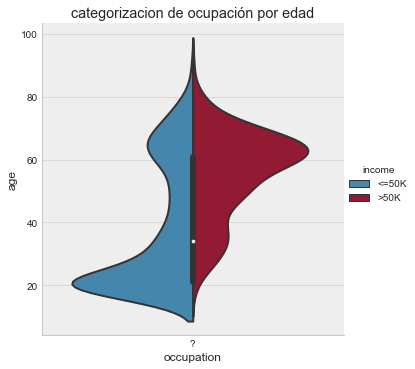

In [66]:
import seaborn as sns
ax = sns.catplot(data=no_jobs, kind='violin', x='occupation', y='age', hue='income', split=True)
ax.set(xlabel='occupation', ylabel='age', title='categorizacion de ocupación por edad')

### Es interesante ver que en este grupo de 2805 individuos los que tienen mayor nivel de ingreso se concentran en los 60 años y los que no llegan a 50k anual se concentra en los 20 años.  Una distribución muy distinta en comparación con la distribución de la población total de esta base.  

### Ahora queremos explorar cómo se distribuye el nivel de ingresos y la edad para las diferentes ocupaciones a fin de elegir una de las ocupaciones para reemplazar el signo "?".  

<AxesSubplot:xlabel='age', ylabel='occupation'>

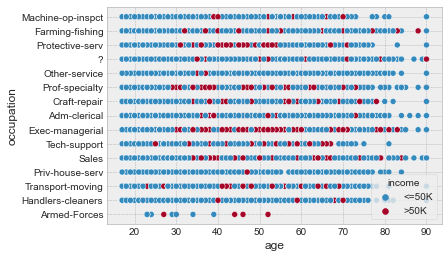

In [67]:
sns.scatterplot(data = df_adult_income_no_duplicates, x ="age", y= "occupation",hue="income")

In [68]:
df_adult_income_no_duplicates[df_adult_income_no_duplicates['occupation']=='Priv-house-serv']['workclass'].value_counts()

workclass
Private    240
Name: count, dtype: int64

### En el gráfico podemos visualizar que Machine-op-inspct, Other-service o Priv-house-serv comparten la distribución del ingreso con los que tienen el signo ?.  Los 3 pueden ser candidatos para realizar el reemplazo.  Sin embargo, lo ideal sería usar Priv-house-serv, ya que todos los Priv-house-serv corresponden el workclass "Private".  

In [33]:
#Correr
#reemplazo los valores ?.
import warnings
warnings.filterwarnings('ignore')
df_adult_income_no_duplicates['occupation']=df_adult_income_no_duplicates['occupation'].replace('?','Priv-house-serv')
df_adult_income_no_duplicates['workclass']=df_adult_income_no_duplicates['workclass'].replace('?','Private')

In [70]:
#verifico que ya fue reemplazado el signo ? por Priv-house-serv en la columna [occupation]
df_adult_income_no_duplicates['occupation'].value_counts()

occupation
Prof-specialty       6165
Craft-repair         6102
Exec-managerial      6082
Adm-clerical         5606
Sales                5501
Other-service        4919
Priv-house-serv      3045
Machine-op-inspct    3017
Transport-moving     2355
Handlers-cleaners    2071
Farming-fishing      1485
Tech-support         1445
Protective-serv       982
Armed-Forces           15
Name: count, dtype: int64

In [71]:
#verifico que ya fue reemplazado el signo ? por Private en la columna [workclass]
df_adult_income_no_duplicates['workclass'].value_counts()

workclass
Private             36655
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

### La variable "hours-per-week" tiene algunos valores extremos que podemos observar en el siguiente gráfico de boxplot.  La mayor parte se concentra entre las 20-60 horas por semana entre ambos géneros.  Consideramos que es improbable que una persona trabaje por encima de 80 horas semanales.  Entonces vamos a reemplazar los valores por encima de 80 por la mediana, que es 40.  

<AxesSubplot:xlabel='gender', ylabel='hours-per-week'>

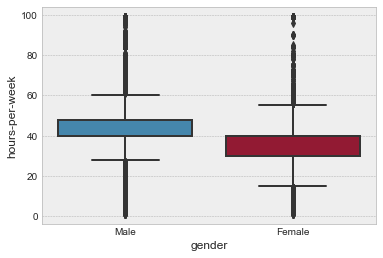

In [72]:
sns.boxplot(data = df_adult_income_no_duplicates,x='gender', y="hours-per-week")

In [73]:
median = np.median(df_adult_income_no_duplicates['hours-per-week'])
median

40.0

In [74]:
#En la variable "hours-per-week" hay 318 valores mayor a 80 horas por semana:
count_above_80=len(df_adult_income_no_duplicates[df_adult_income_no_duplicates['hours-per-week'] > 80])
count_above_80

318

In [34]:
#Correr
#reemplazo todos los valores por encima de 80 en la columna hours-per-week y verifico que ahora el valor max es 80.
df_adult_income_no_duplicates.loc[df_adult_income_no_duplicates['hours-per-week'] > 80, 'hours-per-week'] = 40
df_adult_income_no_duplicates.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.082496
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,11.635425
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,80.000000


# Encoding de las variables categóricas
### Convierto las variables categóricas en numéricas a fin de poder utilizar estos inputs para el modelo.

In [8]:
#quiero visualizar cuáles son las categorias dentro de la variable workclass.
category_1 = df_adult_income_no_duplicates['workclass'].unique()
category_1
df_adult_income_no_duplicates['workclass'].value_counts()

workclass
Private             36655
Self-emp-not-inc     3861
Local-gov            3136
State-gov            1981
Self-emp-inc         1694
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [35]:
#Correr
#quiero reemplazar con números las diferentes categorías
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
workclass = ['Private', 'Local-gov','Self-emp-not-inc', 'Federal-gov',
       'State-gov', 'Self-emp-inc', 'Without-pay', 'Never-worked']
workclass_num = label_encoder.fit_transform(workclass)
print(workclass_num)

[3 1 5 0 6 4 7 2]


In [36]:
#Correr
#Transformo la columna workclass en categorias numéricos y hago lo mismo con las otras variables utilizando la función Label_encoder
df_adult_income_no_duplicates['workclass'] = label_encoder.fit_transform(df_adult_income_no_duplicates['workclass'])
df_adult_income_no_duplicates['marital-status'] = label_encoder.fit_transform(df_adult_income_no_duplicates['marital-status'])
df_adult_income_no_duplicates['occupation'] = label_encoder.fit_transform(df_adult_income_no_duplicates['occupation'])
df_adult_income_no_duplicates['relationship'] = label_encoder.fit_transform(df_adult_income_no_duplicates['relationship'])
df_adult_income_no_duplicates['race'] = label_encoder.fit_transform(df_adult_income_no_duplicates['race'])
df_adult_income_no_duplicates['gender'] = label_encoder.fit_transform(df_adult_income_no_duplicates['gender'])
df_adult_income_no_duplicates['native-country'] = label_encoder.fit_transform(df_adult_income_no_duplicates['native-country'])
df_adult_income_no_duplicates['income'] = label_encoder.fit_transform(df_adult_income_no_duplicates['income'])
df_adult_income_no_duplicates.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,3,226802,11th,7,4,6,3,2,1,0,0,40,39,0
1,38,3,89814,HS-grad,9,2,4,0,4,1,0,0,50,39,0
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,0,0,40,39,1
3,44,3,160323,Some-college,10,2,6,0,2,1,7688,0,40,39,1
4,18,3,103497,Some-college,10,4,8,3,4,0,0,0,30,39,0


In [33]:
df_adult_income_no_duplicates.describe()

,age,workclass,fnlwgt,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
count,48790.000000,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,3.099713,1.896690e+05,10.078807,2.618077,6.096044,1.443472,3.667903,0.668457,1080.217688,87.595573,40.082496,36.751138,0.239414
std,13.708493,1.111356,1.056172e+05,2.570046,1.507877,3.934735,1.602571,0.846133,0.470773,7455.905921,403.209129,11.635425,7.774674,0.426730
min,17.000000,0.000000,1.228500e+04,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,3.000000,1.175550e+05,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,0.000000
50%,37.000000,3.000000,1.781385e+05,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,0.000000
75%,48.000000,3.000000,2.376062e+05,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,0.000000
max,90.000000,7.000000,1.490400e+06,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,80.000000,41.000000,1.000000


# Creación de variables sintéticas

### Continuando con la creación de variables secundarias, la segunda variable que vamos a crear es Weighted-age, que sería la edad ponderada por el nivel educativo y las horas trabajadas en la semana.  Utilizo la edad, el nivel educativo y las horas trabajadas son variables destacadas que guardan cierta correlación con el target Income.  De esta manera, estoy combinando las 3 variables en una, como si fuera un promedio ponderado.  

In [37]:
#correr
df_adult_income_no_duplicates['Weighted-age']= round(df_adult_income_no_duplicates['age']*(df_adult_income_no_duplicates['hours-per-week']/df_adult_income_no_duplicates['educational-num']),0)
#pongo la nueva columna delante de la variable target "income".
column_list = list(df_adult_income_no_duplicates.columns)
column_list.insert(-1, column_list.pop())
df_adult_income_no_duplicates=df_adult_income_no_duplicates[column_list]
df_adult_income_no_duplicates.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Weighted-age,income
0,25,3,226802,11th,7,4,6,3,2,1,0,0,40,39,143.0,0
1,38,3,89814,HS-grad,9,2,4,0,4,1,0,0,50,39,211.0,0
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,0,0,40,39,93.0,1
3,44,3,160323,Some-college,10,2,6,0,2,1,7688,0,40,39,176.0,1
4,18,3,103497,Some-college,10,4,8,3,4,0,0,0,30,39,54.0,0


### La tercera variable que vamos a crear es Marital-occupation, que es el valor de occupation multiplicado por la suma de marital-status y relationship.  Si bien estas variables no son las que generan mayor impacto en el análisis exploratorio, combinando las 3 podemos sumar sus ponderaciones para generar más impacto en el modelo.  

In [38]:
#correr
df_adult_income_no_duplicates['Marital-occupation']= df_adult_income_no_duplicates['occupation']*(df_adult_income_no_duplicates['marital-status']+df_adult_income_no_duplicates['relationship'])
#pongo la nueva columna delante de la variable target "income".
column_list = list(df_adult_income_no_duplicates.columns)
column_list.insert(-1, column_list.pop())
df_adult_income_no_duplicates=df_adult_income_no_duplicates[column_list]
df_adult_income_no_duplicates.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Weighted-age,Marital-occupation,income
0,25,3,226802,11th,7,4,6,3,2,1,0,0,40,39,143.0,42,0
1,38,3,89814,HS-grad,9,2,4,0,4,1,0,0,50,39,211.0,8,0
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,0,0,40,39,93.0,20,1
3,44,3,160323,Some-college,10,2,6,0,2,1,7688,0,40,39,176.0,12,1
4,18,3,103497,Some-college,10,4,8,3,4,0,0,0,30,39,54.0,56,0


### Por último, creamos la variable Gain per occupation, que es capital-gain dividido la suma de workclass, occupation y raza.  El motivo de utilizar estas variables es similar a la variable creada anteriormente, la idea es crear un índice sintético que combina el impacto de estas variables.  

In [39]:
#correr
df_adult_income_no_duplicates['Gain per occupation']= round(df_adult_income_no_duplicates['capital-gain']*(df_adult_income_no_duplicates['occupation']+df_adult_income_no_duplicates['workclass']+df_adult_income_no_duplicates['race']),0)
#pongo la nueva columna delante de la variable target "income".
column_list = list(df_adult_income_no_duplicates.columns)
column_list.insert(-1, column_list.pop())
df_adult_income_no_duplicates=df_adult_income_no_duplicates[column_list]
df_adult_income_no_duplicates.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Weighted-age,Marital-occupation,Gain per occupation,income
0,25,3,226802,11th,7,4,6,3,2,1,0,0,40,39,143.0,42,0,0
1,38,3,89814,HS-grad,9,2,4,0,4,1,0,0,50,39,211.0,8,0,0
2,28,1,336951,Assoc-acdm,12,2,10,0,4,1,0,0,40,39,93.0,20,0,1
3,44,3,160323,Some-college,10,2,6,0,2,1,7688,0,40,39,176.0,12,84568,1
4,18,3,103497,Some-college,10,4,8,3,4,0,0,0,30,39,54.0,56,0,0


In [40]:
#Correr
#elijo solamente las columnas numéricas para correr el modelo. 
import pandas as pd
import numpy as np
selected_columns_1 = ['age','workclass','educational-num','marital-status','occupation','relationship','race','gender','capital-gain','capital-loss','hours-per-week','native-country','Weighted-age','Marital-occupation','Gain per occupation','income']
datos_para_modelo = df_adult_income_no_duplicates[selected_columns_1].copy()
datos_para_modelo.describe()

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,Weighted-age,Marital-occupation,Gain per occupation,income
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,4.879000e+04,48790.000000
mean,38.652798,3.099713,10.078807,2.618077,6.096044,1.443472,3.667903,0.668457,1080.217688,87.595573,40.082496,36.751138,171.439065,24.659541,1.469255e+04,0.239414
std,13.708493,1.111356,2.570046,1.507877,3.934735,1.602571,0.846133,0.470773,7455.905921,403.209129,11.635425,7.774674,135.200712,23.270831,1.079995e+05,0.426730
min,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,3.000000,9.000000,2.000000,3.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,39.000000,103.000000,6.000000,0.000000e+00,0.000000
50%,37.000000,3.000000,10.000000,2.000000,7.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,39.000000,147.000000,18.000000,0.000000e+00,0.000000
75%,48.000000,3.000000,12.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,39.000000,204.000000,40.000000,0.000000e+00,0.000000
max,90.000000,7.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,80.000000,41.000000,4620.000000,130.000000,2.099979e+06,1.000000


In [41]:
df_adult_income_no_duplicates.isnull().sum() #Me aseguro que no haya NaN porque Random Forest no acepta valores NaN.

age                    0
workclass              0
fnlwgt                 0
education              0
educational-num        0
marital-status         0
occupation             0
relationship           0
race                   0
gender                 0
capital-gain           0
capital-loss           0
hours-per-week         0
native-country         0
Weighted-age           0
Marital-occupation     0
Gain per occupation    0
income                 0
dtype: int64

In [42]:
#Correr 
#Tomamos todas las variables numéricas
X = datos_para_modelo.iloc[:,0:16]
y = datos_para_modelo['income']

# Prueba de Contingencia o Chi Cuadrado

### Cuando hablamos de feature selection, el test de Chi Cuadrado es un método para evaluar la relación entre cada feature y la variable target.  Al calcular el p-value de cada feature, podemos seleccionar cuáles son las variables más significativas.  
### Utilizamos la prueba de contingencia o χ2 en vez del proceso Forward Feature Selection porque este dataset contiene muchas variables categóricas.  

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Dividir el conjunto de datos en características (X) y variable objetivo (y)
M = df_adult_income_no_duplicates.drop(['fnlwgt', 'income'], axis=1)
n = df_adult_income_no_duplicates['income']

In [16]:
# Convertir las características categóricas en variables dummy (one-hot encoding)
M = pd.get_dummies(M)
M

,age,workclass,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,...,education_9th,education_Assoc-acdm,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,education_Prof-school,education_Some-college
0,25,3,7,4,6,3,2,1,0,0,...,False,False,False,False,False,False,False,False,False,False
1,38,3,9,2,4,0,4,1,0,0,...,False,False,False,False,False,True,False,False,False,False
2,28,1,12,2,10,0,4,1,0,0,...,False,True,False,False,False,False,False,False,False,False
3,44,3,10,2,6,0,2,1,7688,0,...,False,False,False,False,False,False,False,False,False,True
4,18,3,10,4,8,3,4,0,0,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,3,12,2,12,5,4,0,0,0,...,False,True,False,False,False,False,False,False,False,False
48838,40,3,9,2,6,0,4,1,0,0,...,False,False,False,False,False,True,False,False,False,False
48839,58,3,9,6,0,4,4,0,0,0,...,False,False,False,False,False,True,False,False,False,False
48840,22,3,9,4,0,3,4,1,0,0,...,False,False,False,False,False,True,False,False,False,False


In [17]:
# Aplicar la prueba chi-cuadrado para la selección de características
# Seleccionaremos las 6 mejores características en este ejemplo
selector = SelectKBest(score_func=chi2, k=6)
M_new = selector.fit_transform(M,n)

In [18]:
# Obtener los índices de las características seleccionadas
selected_features_indices = selector.get_support(indices=True)
# Obtener los nombres de las características seleccionadas
selected_features = M.columns[selected_features_indices]
# Ver las características seleccionadas
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['age', 'capital-gain', 'capital-loss', 'hours-per-week',
       'Marital-occupation', 'Gain per occupation'],
      dtype='object')


### Conclusión:
### En la prueba de contingencia seleccionamos las 6 variables que más correlación tienen con la variable target: edad, ganancia de capital, pérdida de capital, horas trabajadas por semana y las variables sintéticas estado matrimonial-ocupación y ganancias por ocupación.

### Podemos ir probando diferentes valores de k, por ejemplo, k=10, k=12, etc.

In [19]:
# Aplicar la prueba chi-cuadrado para la selección de características
# Seleccionaremos las 10 mejores características en este ejemplo
selector = SelectKBest(score_func=chi2, k=10)
M_new = selector.fit_transform(M,n)
# Obtener los índices de las características seleccionadas
selected_features_indices = selector.get_support(indices=True)
# Obtener los nombres de las características seleccionadas
selected_features = M.columns[selected_features_indices]
# Ver las características seleccionadas
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['age', 'educational-num', 'marital-status', 'relationship',
       'capital-gain', 'capital-loss', 'hours-per-week', 'Weighted-age',
       'Marital-occupation', 'Gain per occupation'],
      dtype='object')


In [20]:
# Aplicar la prueba chi-cuadrado para la selección de características
# Seleccionaremos las 12 mejores características en este ejemplo
selector = SelectKBest(score_func=chi2, k=12)
M_new = selector.fit_transform(M,n)
# Obtener los índices de las características seleccionadas
selected_features_indices = selector.get_support(indices=True)
# Obtener los nombres de las características seleccionadas
selected_features = M.columns[selected_features_indices]
# Ver las características seleccionadas
print("Características seleccionadas:")
print(selected_features)

Características seleccionadas:
Index(['age', 'educational-num', 'marital-status', 'relationship',
       'capital-gain', 'capital-loss', 'hours-per-week', 'Weighted-age',
       'Marital-occupation', 'Gain per occupation', 'education_Bachelors',
       'education_Masters'],
      dtype='object')


### Conclusión:
### Cuando seteamos k=10, vemos que las variables más importantes son las originales y las sintéticas, pero cuando seteamos k=12, empezamos a encontrar variables creadas por la función get_dummies.  

# Entrenamiento del Dataset Parte 1
### Preparamos los datos para su entrenamiento en los modelos.  En esta parte, estamos tomando todas las variables numéricas, sin respetar el resultado de la Prueba de contingencia que realizamos anteriormente.  Luego en la parte 2 de entrenamiento del dataset, tendremos en cuenta el resultado de la prueba de contingencia.  

## Algoritmo de clasificación utilizando árbol de decisión

### Primero vamos a entrenar el dataset con árboles de decisión.  

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [22]:
#separo entre dataset de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#Entreno con el clasificador
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
#hago predicciones sobre el dataset de testing
y_pred = classifier.predict(X_test)
#evaluo el accuracy del modelo
accuracy_1 = accuracy_score(y_test, y_pred)
report_1 = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy_1}")
#print(classification_report(y_test, y_pred))

Accuracy: 0.8211723713875794


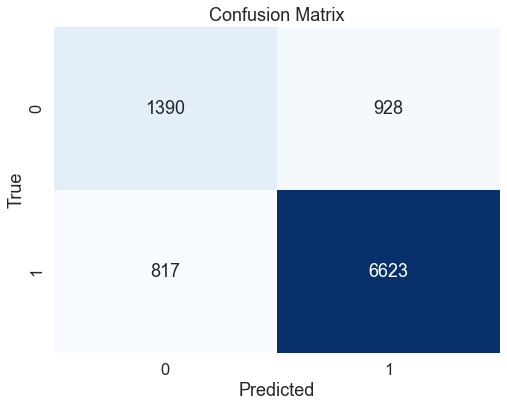

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
plt.figure(figsize=(8,6))
sns.set(font_scale = 1.5)
#metrics.plot_confusion_matrix(classifier, X_test, y_test, display_labels=['Negative', 'Positive'])
confusion_matrix=confusion_matrix(y_test, y_pred, labels=[1, 0])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [24]:
from sklearn.metrics import precision_score
Precision_1 = precision_score(y_test, y_pred)
Precision_1

0.6298142274580879

In [25]:
#Cálculo de precisión
precision_high_income = precision_score(y_test, y_pred, pos_label=1)
precision_low_income = precision_score(y_test, y_pred, pos_label=0)
precision_high_income, precision_low_income

(0.6298142274580879, 0.8771023705469474)

In [26]:
from sklearn.metrics import recall_score
Recall_1 = recall_score(y_test, y_pred)
Recall_1

0.5996548748921484

In [27]:
#Cálculo de recall
recall_sensibilidad = recall_score(y_test, y_pred, pos_label=1)
recall_especificidad= recall_score(y_test, y_pred, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.5996548748921484, 0.8901881720430107)

In [28]:
from sklearn.metrics import f1_score
F1_score_1= f1_score(y_test, y_pred)
F1_score_1

0.6143646408839779

In [29]:
#Cálculo de F1
f1_positivo = f1_score(y_test, y_pred, pos_label=1)
f1_negativo = f1_score(y_test, y_pred, pos_label=0)
f1_positivo, f1_negativo

(0.6143646408839779, 0.8835968247615236)

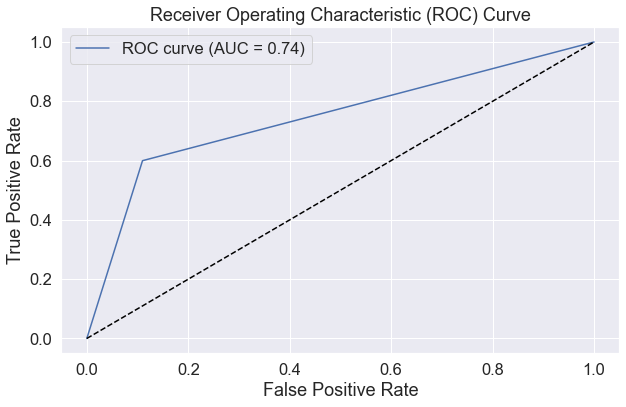

In [30]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc_1 = roc_auc_score(y_test, y_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_1))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line representing random prediction
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### El modelo arrojó un valor de Accuracy de 82.12%, que significa que el modelo predice correctamente el 82% de los casos.
### Considerando los resultados de precisión, podemos decir que el modelo es más confiable cuando predice sobre los individuos con un ingreso menor a 50k anual, ya que la precisión para esa clase es cerca de 88%.  En cambio, el modelo sólo acierta en el 63% de los casos cuando predice sobre los individuos con un ingreso mayor a 50k anual.  Esto tiene que ver con que la base no es balanceada. 
### Viendo los resultados de recall, el modelo detecta en el 89% de los casos los individuos con ingreso menor a 50k anual y sólo en el 60% de los casos los individuos con ingreso mayor a 50k.  
### Los valores de F1 tienen la misma tendencia que las medidas de precisión y recall.  Este modelo no logra clasificar bien el grupo de ingreso mayor a 50k anual. 

### Al tener un dataset desbalanceado, necesitamos hacer una corrección utilizando el algoritmo RandomOverSampler de Imblearn.  A continuación, vamos a utilizar el mismo algoritmo de árbol de decisión con la corrección.

In [17]:
pip install -U imbalanced-learn

     |████████████████████████████████| 235 kB 4.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.2 MB 158 kB/s eta 0:00:01
     |████████████████████████████████| 302 kB 15.4 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [31]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto',random_state=42) #Se crea el objeto de balanceo
X_ros, y_ros = ros.fit_resample(X, y) #Se balancean los datos
modelo = DecisionTreeClassifier(max_depth=3, random_state = 42) #Se crea un arbol de decisiones
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42) #Se particionan los datos
modelo.fit(X_train,y_train) #Se entrena el modelo
y_test_pred = modelo.predict(X_test) #Se realiza una prediccion
#evaluo el accuracy del modelo
accuracy_2 = accuracy_score(y_test, y_test_pred)
print(f"Accuracy: {accuracy_2}")
print(classification_report(y_test, y_test_pred))

Accuracy: 0.7852780023353992
              precision    recall  f1-score   support

           0       0.75      0.85      0.80     11149
           1       0.83      0.72      0.77     11117

    accuracy                           0.79     22266
   macro avg       0.79      0.79      0.78     22266
weighted avg       0.79      0.79      0.78     22266



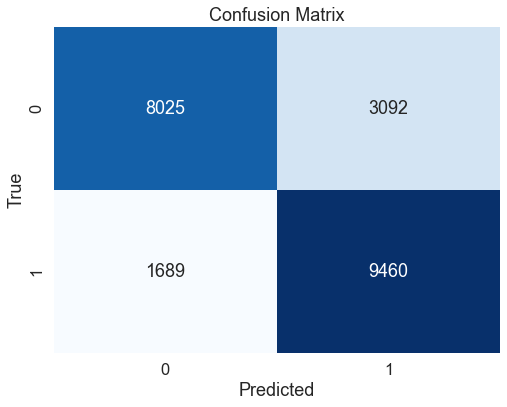

In [32]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))
sns.set(font_scale = 1.5)
confusion_matrix=confusion_matrix(y_test, y_test_pred, labels=[1, 0])
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [33]:
Precision_2 = precision_score(y_test, y_test_pred)  #No puedo calcular los valores de precisión, recall y F1_score.  
Recall_2 = recall_score(y_test, y_test_pred)
F1_score_2= f1_score(y_test, y_test_pred)
print(Precision_2,Recall_2,F1_score_2)

0.8261272390364423 0.7218674102725555 0.7704862944649801


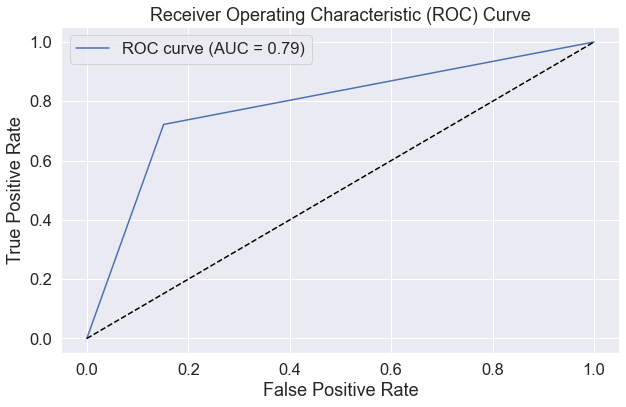

In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
auc_2 = roc_auc_score(y_test, y_test_pred)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_2))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line representing random prediction
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Balanceando la base de datos y utilizando el algoritmo de árbol de decisión, obtenemos un valor promedio de accuracy de 0.78.  Podemos observar en la matriz de confusión que la cantidad de casos para el entrenamiento y testeo aumentaron justamente por el balanceo.  Si bien este accuracy general es más bajo que el modelo sin balancear, el modelo balanceado tiene una precisión más alta cuando predice la clase 1, es decir, para el caso del ingreso superior los 50k anual el modelo es más efectivo para detectar los falsos positivos.  Su índice de recall es menor para la clase 1 que para la clase 0, quiere decir que este modelo no es tan efectivo para detectar los falsos negativos.  El F1-score es más alto para la clase 0 que la clase 1 (0.80 vs. 0.77), es decir, el modelo tiene un rendimiento general mayor para esa clase que para la clase 1. 
### Podemos concluir que al ajustar el desbalanceo del dataset, el modelo tiene mejor rendimiento para predecir la clase 1, ya que el F1-score es más alto utilizando el algoritmo de Random Over Sampler porque aumenta la cantidad de casos para el testeo de esa clase. 
### También observamos que el AUC de la curva ROC dio levemente más alto (0.79 vs. 0.74) cuando usamos el Random Over Sampler. 

## A continuación vamos a probar de entrenar con otro clasificador: Random Forest.

### Incorporamos RandomOverSampler al clasificador de Random Forest. 

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto',random_state=42) #Se crea el objeto de balanceo
X_ros, y_ros = ros.fit_resample(X, y) #Se balancean los datos
modelo_2 = RandomForestClassifier(n_estimators=100, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42) #Se particionan los datos
modelo_2.fit(X_train,y_train) #Se entrena el modelo
y_pred_RF = modelo_2.predict(X_test) #Se realiza una prediccion
#evaluo el accuracy del modelo
accuracy_3 = accuracy_score(y_test, y_pred_RF)
print(f"Accuracy: {accuracy_3}")
print(classification_report(y_test, y_pred_RF))

Accuracy: 0.908919428725411
              precision    recall  f1-score   support

           0       0.94      0.87      0.91     11149
           1       0.88      0.94      0.91     11117

    accuracy                           0.91     22266
   macro avg       0.91      0.91      0.91     22266
weighted avg       0.91      0.91      0.91     22266



In [37]:
Precision_3 = precision_score(y_test, y_pred_RF)  
Recall_3 = recall_score(y_test, y_pred_RF)
F1_score_3= f1_score(y_test, y_pred_RF)
print(Precision_3,Recall_3,F1_score_3)

0.8816662467456118 0.9443195106593505 0.9119179986101459


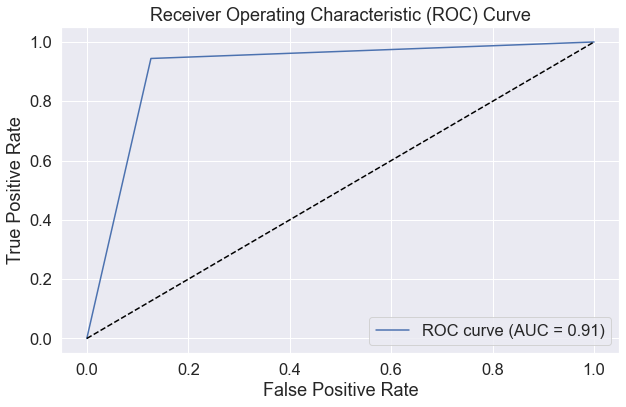

In [38]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF)
auc_3 = roc_auc_score(y_test, y_pred_RF)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_3))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line representing random prediction
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Haciendo la corrección del desbalanceo del dataset, el rendimiento del Random Forest es muy superior, ya que el acurracy promedio llegó a ser 90.9%.  Y lo más importante es que mejoró también su capacidad de predecir la clase 1.  La curva ROC también dejó un área bajo la curva más grande que el modelo de árboles de decisión.  

### A continuación, armamos un cuadro comparativo con las principales métricas de los 3 modelos que entrenamos anteriormente.  Podemos visualizar que el random forest balanceado es el superador entre todos. 

In [39]:
import pandas as pd

# Example data (replace with your actual data)
algorithm_names = ['Árbol de decisión', 'Árbol de decisión Balanceado', 'Random forest Balanceado']
accuracy_scores = [accuracy_1, accuracy_2, accuracy_3]  # Sample accuracy scores
f1_scores = [F1_score_1, F1_score_2, F1_score_3]  # Sample F1 scores
precision = [Precision_1, Precision_2, Precision_3]
recall = [Recall_1, Recall_2, Recall_3]
roc_auc_score = [auc_1, auc_2, auc_3]

# Creating a DataFrame
data = {
    'Algorithm': algorithm_names,
    'Accuracy': accuracy_scores,
    'F1 Score': f1_scores,
    'Precision': precision,
    'Recall': recall,
    'ROC_AUC': roc_auc_score
}

df = pd.DataFrame(data)

# Display the table
print(df)

                      Algorithm  Accuracy  F1 Score  Precision    Recall  \
0             Árbol de decisión  0.821172  0.614365   0.629814  0.599655   
1  Árbol de decisión Balanceado  0.785278  0.770486   0.826127  0.721867   
2      Random forest Balanceado  0.908919  0.911918   0.881666  0.944320   

    ROC_AUC  
0  0.744922  
1  0.785187  
2  0.908970  


## Conclusión:
### Finalmente podemos llegar a la conclusión de que el modelo de Random Forest Balanceado es el mejor de los 3 modelos, ya que todas las métricas (accuracy, precisión, recall y ROC_AUC) tuvieron resultados muy positivos y superiores a los otros modelos.  Esto es porque Random Forest combina varios árboles de decisión en el algoritmo para realizar la predicción, por lo tanto, el resultado suele ser mejor que el de un árbol de decisión sólo.  Además, Random Forest mejora el problema de overfitting que trae el modelo de árbol de decisión.  

# Cross Validation

### A continuación vamos a aplicar Cross Validation al modelo Random Forest.  Utilizamos el K-fold y seteamos 5 folds para optimizar el tiempo de entrenamiento. 

In [61]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [97]:
kf=KFold(n_splits=5, random_state = 30, shuffle = True) #seteamos 5 folds utilizando 
kf.get_n_splits(X_ros, y_ros)

5

In [98]:
#aplicamos el cross-validation a Random Forest y verificamos el valor de roc_auc. 
modelo_3 = RandomForestClassifier(n_estimators=100, random_state=42)
Models=cross_validate(modelo_3,X_ros,y_ros,cv=kf,return_estimator =True, scoring = "roc_auc")

In [99]:
Models

{'fit_time': array([4.30491495, 4.30669117, 4.27117062, 4.30792665, 4.2881279 ]),
 'score_time': array([0.21536875, 0.21648479, 0.21803212, 0.22109222, 0.23895192]),
 'estimator': [RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42),
  RandomForestClassifier(random_state=42)],
 'test_score': array([0.97064829, 0.97187094, 0.97043746, 0.9734136 , 0.97119138])}

In [100]:
#Calculo el promedio de los resultados de roc_auc.  
Models["test_score"].mean()

0.9715123329057705

## Conclusión:
### Aplicando el Cross Validation, vemos que el valor del área bajo la curva ROC incrementó de 0.9089 a un promedio de 0.9715 de los 5 folds.  El Cross Validation mejoró ampliamente el rendimiento del modelo porque reduce el riesgo de overfitting del modelo.  

### Otra alternativa de realizar el cross validation es iterar explícitamente las particiones:

In [91]:
baseFinal = pd.DataFrame()
modelosEntrenados = []
# X is the feature set and y is the target
for train_index, test_index in kf.split(X,y): 
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    aux = X_test.copy()
    aux["target"] = y_test
    learner = RandomForestClassifier(n_estimators=100, random_state=42)
    #Entreno el modelo con la informacion de train
    learner.fit(X_train, y_train)
    modelosEntrenados.append(learner)
    aux["Score"] = learner.predict_proba(X_test)[:,1]
    #baseFinal = baseFinal._append(aux)  #para pd hay que usar _append en vez de append
    print(aux["Score"])

2        0.620333
3        1.000000
5        0.000000
8        0.000000
11       0.069167
           ...   
48825    0.170000
48828    0.067680
48831    0.115000
48834    0.020000
48841    0.990000
Name: Score, Length: 9758, dtype: float64
4        0.000000
15       0.978833
20       0.806667
27       0.010000
29       0.060000
           ...   
48817    0.540000
48820    0.580000
48829    0.280000
48832    0.026000
48833    0.658333
Name: Score, Length: 9758, dtype: float64
21       0.01000
22       0.00000
30       1.00000
33       0.08000
36       0.56248
          ...   
48819    0.99000
48821    0.01000
48823    0.02000
48824    0.14000
48830    0.00000
Name: Score, Length: 9758, dtype: float64
0        0.000000
1        0.384667
7        0.580000
9        0.020000
12       0.000000
           ...   
48806    0.050000
48813    0.590000
48818    0.020000
48827    0.110000
48835    0.576833
Name: Score, Length: 9758, dtype: float64
6        0.020000
10       0.970000
16       0.0000

# Entrenamiento del Dataset Parte 2
### En esta parte vamos a utilizar solamente las variables más significativas, resultado de la prueba de contingencia, para entrenar el modelo Random Forest Balanceado.  Vamos a utilizar las 10 variables más significativas:
### 'age', 
### 'educational-num', 
### 'marital-status', 
### 'relationship',
### 'capital-gain', 
### 'capital-loss', 
### 'hours-per-week', 
### 'Weighted-age',
### 'Marital-occupation', 
### 'Gain per occupation'

In [44]:
selected_columns_2 = ['age','educational-num','marital-status','relationship','capital-gain','capital-loss','hours-per-week','Weighted-age','Marital-occupation','Gain per occupation','income']
Entrenamiento_2 = df_adult_income_no_duplicates[selected_columns_2].copy()
Entrenamiento_2.describe()

,age,educational-num,marital-status,relationship,capital-gain,capital-loss,hours-per-week,Weighted-age,Marital-occupation,Gain per occupation,income
count,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,48790.000000,4.879000e+04,48790.000000
mean,38.652798,10.078807,2.618077,1.443472,1080.217688,87.595573,40.082496,171.439065,24.659541,1.469255e+04,0.239414
std,13.708493,2.570046,1.507877,1.602571,7455.905921,403.209129,11.635425,135.200712,23.270831,1.079995e+05,0.426730
min,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000e+00,0.000000
25%,28.000000,9.000000,2.000000,0.000000,0.000000,0.000000,40.000000,103.000000,6.000000,0.000000e+00,0.000000
50%,37.000000,10.000000,2.000000,1.000000,0.000000,0.000000,40.000000,147.000000,18.000000,0.000000e+00,0.000000
75%,48.000000,12.000000,4.000000,3.000000,0.000000,0.000000,45.000000,204.000000,40.000000,0.000000e+00,0.000000
max,90.000000,16.000000,6.000000,5.000000,99999.000000,4356.000000,80.000000,4620.000000,130.000000,2.099979e+06,1.000000


In [45]:
#Separamos el dataset
P = Entrenamiento_2.iloc[:,0:9]
q = Entrenamiento_2['income']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy='auto',random_state=42) #Se crea el objeto de balanceo
X_ros, y_ros = ros.fit_resample(P, q) #Se balancean los datos
modelo_5 = RandomForestClassifier(n_estimators=100, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.30, random_state=42) #Se particionan los datos
modelo_5.fit(X_train,y_train) #Se entrena el modelo
y_pred_RF_5 = modelo_5.predict(X_test) #Se realiza una prediccion
#evaluo el accuracy del modelo
accuracy_5 = accuracy_score(y_test, y_pred_RF_5)
print(f"Accuracy: {accuracy_5}")
print(classification_report(y_test, y_pred_RF_5))

In [28]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
Precision_5 = precision_score(y_test, y_pred_RF_5)  
Recall_5 = recall_score(y_test, y_pred_RF_5)
F1_score_5= f1_score(y_test, y_pred_RF_5)
print(Precision_5,Recall_5,F1_score_5)

0.8644603359387992 0.9351443734820545 0.8984142073197079


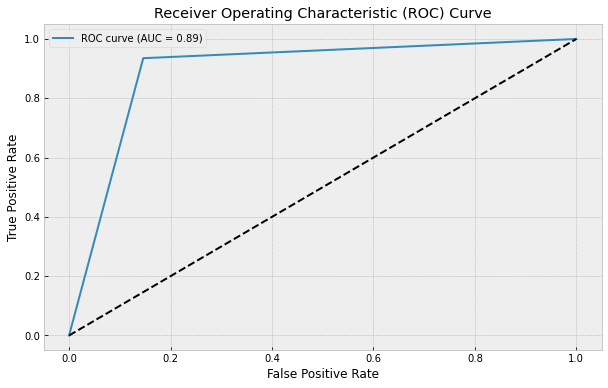

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_RF_5)
auc_1 = roc_auc_score(y_test, y_pred_RF_5)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc_1))
plt.plot([0, 1], [0, 1], color='black', linestyle='--')  # Diagonal line representing random prediction
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Conclusión: en comparación con el modelo Random Forest Balanceado entrenado con todas las variables del dataset, que son 16, este modelo entrenado con sólo 10 variables arrojadas por la prueba de contingencia obtuvo resultados levemente inferiores de accuracy, recall, F1 score y AUC de la curva ROC.  

# Hypertuning

### En esta parte vamos a utilizar las metodologías Grid Search y Randomized Search para detectar cuáles son los mejores hiperparámetros que pueden mejorar el rendimiento del modelo de Random Forest.  

### Primero identifiquemos cuáles son los hyperparámetros del modelo Random Forest:
### max_features: es la cantidad máxima de features que se puede tener en un árbol individual. 
### n_estimators: representa la cantidad de árboles.
### n_jobs: cantidad de procesadores.
### random_state: define el nivel de aleatoriedad de las muestras.
### criterion: el criterio para medir la performance del modelo.

In [51]:
from sklearn.model_selection import GridSearchCV
params_grid = {
        'max_features': ['Auto', 'sqrt', 0.1, 0.2],
        'n_estimators': [30, 50, 100],
        'n_jobs': [-1, 1],
        'random_state': [42,50,58],
        'criterion':['entropy','gini']
        }

In [58]:
grid_cv = GridSearchCV(modelo_5, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
accuracy_6=round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)

print("Mejores Parametros", grid_cv.best_params_)
print("Mejor CV score", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores Parametros {'criterion': 'gini', 'max_features': 0.1, 'n_estimators': 100, 'n_jobs': -1, 'random_state': 58}
Mejor CV score 0.8805050622593013
Accuracy del modelo = 0.89607


In [59]:
from sklearn.model_selection import RandomizedSearchCV
grid_cv = RandomizedSearchCV(modelo_5, params_grid, scoring="accuracy", n_jobs=-1, cv=3)
grid_cv.fit(X_train, y_train)
accuracy_7 = round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)

print("Mejores parametros", grid_cv.best_params_)
print("Mejor score de CV", grid_cv.best_score_)
print(f'Accuracy del modelo = {round(accuracy_score(y_test, grid_cv.predict(X_test)), 5)}')

Mejores parametros {'random_state': 58, 'n_jobs': 1, 'n_estimators': 100, 'max_features': 0.1, 'criterion': 'gini'}
Mejor score de CV 0.8805050622593013
Accuracy del modelo = 0.89607


In [60]:
Hypertuning_algorithms = ['Random Forest con 10 variables', 'GridSearch', 'RandomizedSearch']
accuracy_scores_parte2 = [accuracy_5, accuracy_6, accuracy_7]  # Sample accuracy scores

# Creating a DataFrame
data = {
    'Algorithm': Hypertuning_algorithms,
    'Accuracy': accuracy_scores_parte2
}

df = pd.DataFrame(data)

# Display the table
print(df)

                        Algorithm  Accuracy
0  Random Forest con 10 variables  0.894413
1                      GridSearch  0.896070
2                RandomizedSearch  0.896070


### Conclusión: luego de probar con los métodos de hypertuning, llegamos a la conclusión de que los métodos Grid Search y Randomized Search nos proporcionan los valores óptimos para definir los hyperparámetros y nos arrojan mejores resultados de accuracy que el modelo original de Random Forest.  